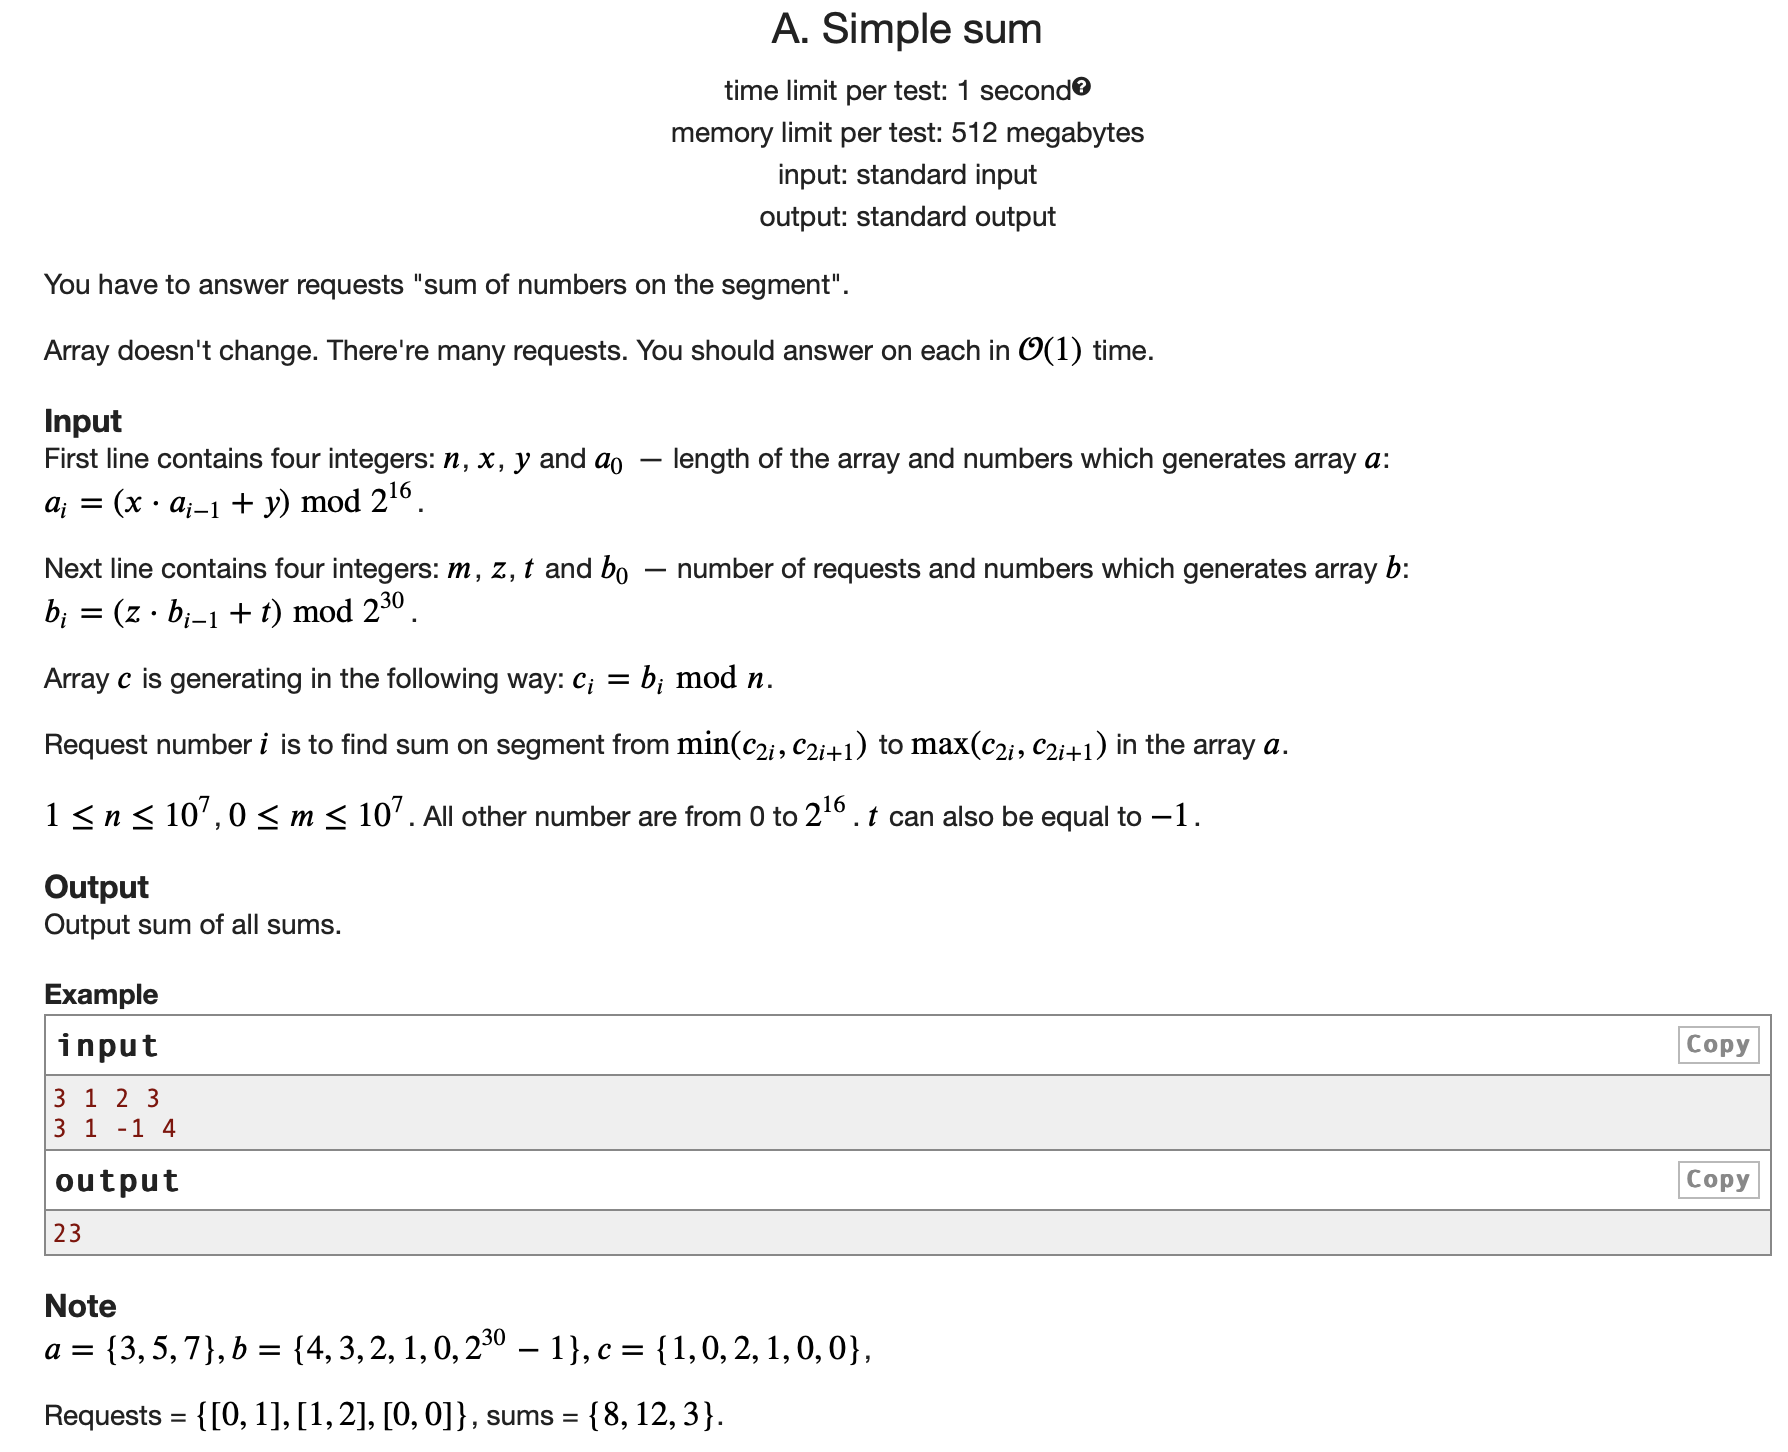

In [186]:
GEN_CONST_A = 2 ** 16
GEN_CONST_B = 2 ** 30


def generator_a(n, x, y, a_0):
    arr_a = [a_0] * n
    prev_sum = [a_0] * n
    for i in range(1, n):
        arr_a[i] = (x * arr_a[i - 1] + y) % GEN_CONST_A
        prev_sum[i] = arr_a[i] + prev_sum[i - 1]
    return arr_a, prev_sum


def generator_b(m, z, t, b_0):
    prev_value = b_0
    for i in range(2 * m):
        if i == 0:
            yield prev_value
        else:
            next_value = (z * prev_value + t) % GEN_CONST_B
            prev_value = next_value
            yield next_value


def generator_c(b_gen, n):
    for val in b_gen:
        yield val % n


n, *gen_a_params = list(map(int, input().split()))
m, *gen_b_params = list(map(int, input().split()))

_, prev_sum = generator_a(n, *gen_a_params)
b = generator_b(m, *gen_b_params)
c = generator_c(b, n)

res = 0
for i in range(m):
    values = (next(c), next(c))
    l = min(values)
    r = max(values)
    if l == 0:
        res += prev_sum[r]
    else:
        res += prev_sum[r] - prev_sum[l - 1]
print(res)

3 1 2 3
3 1 -1 4
23


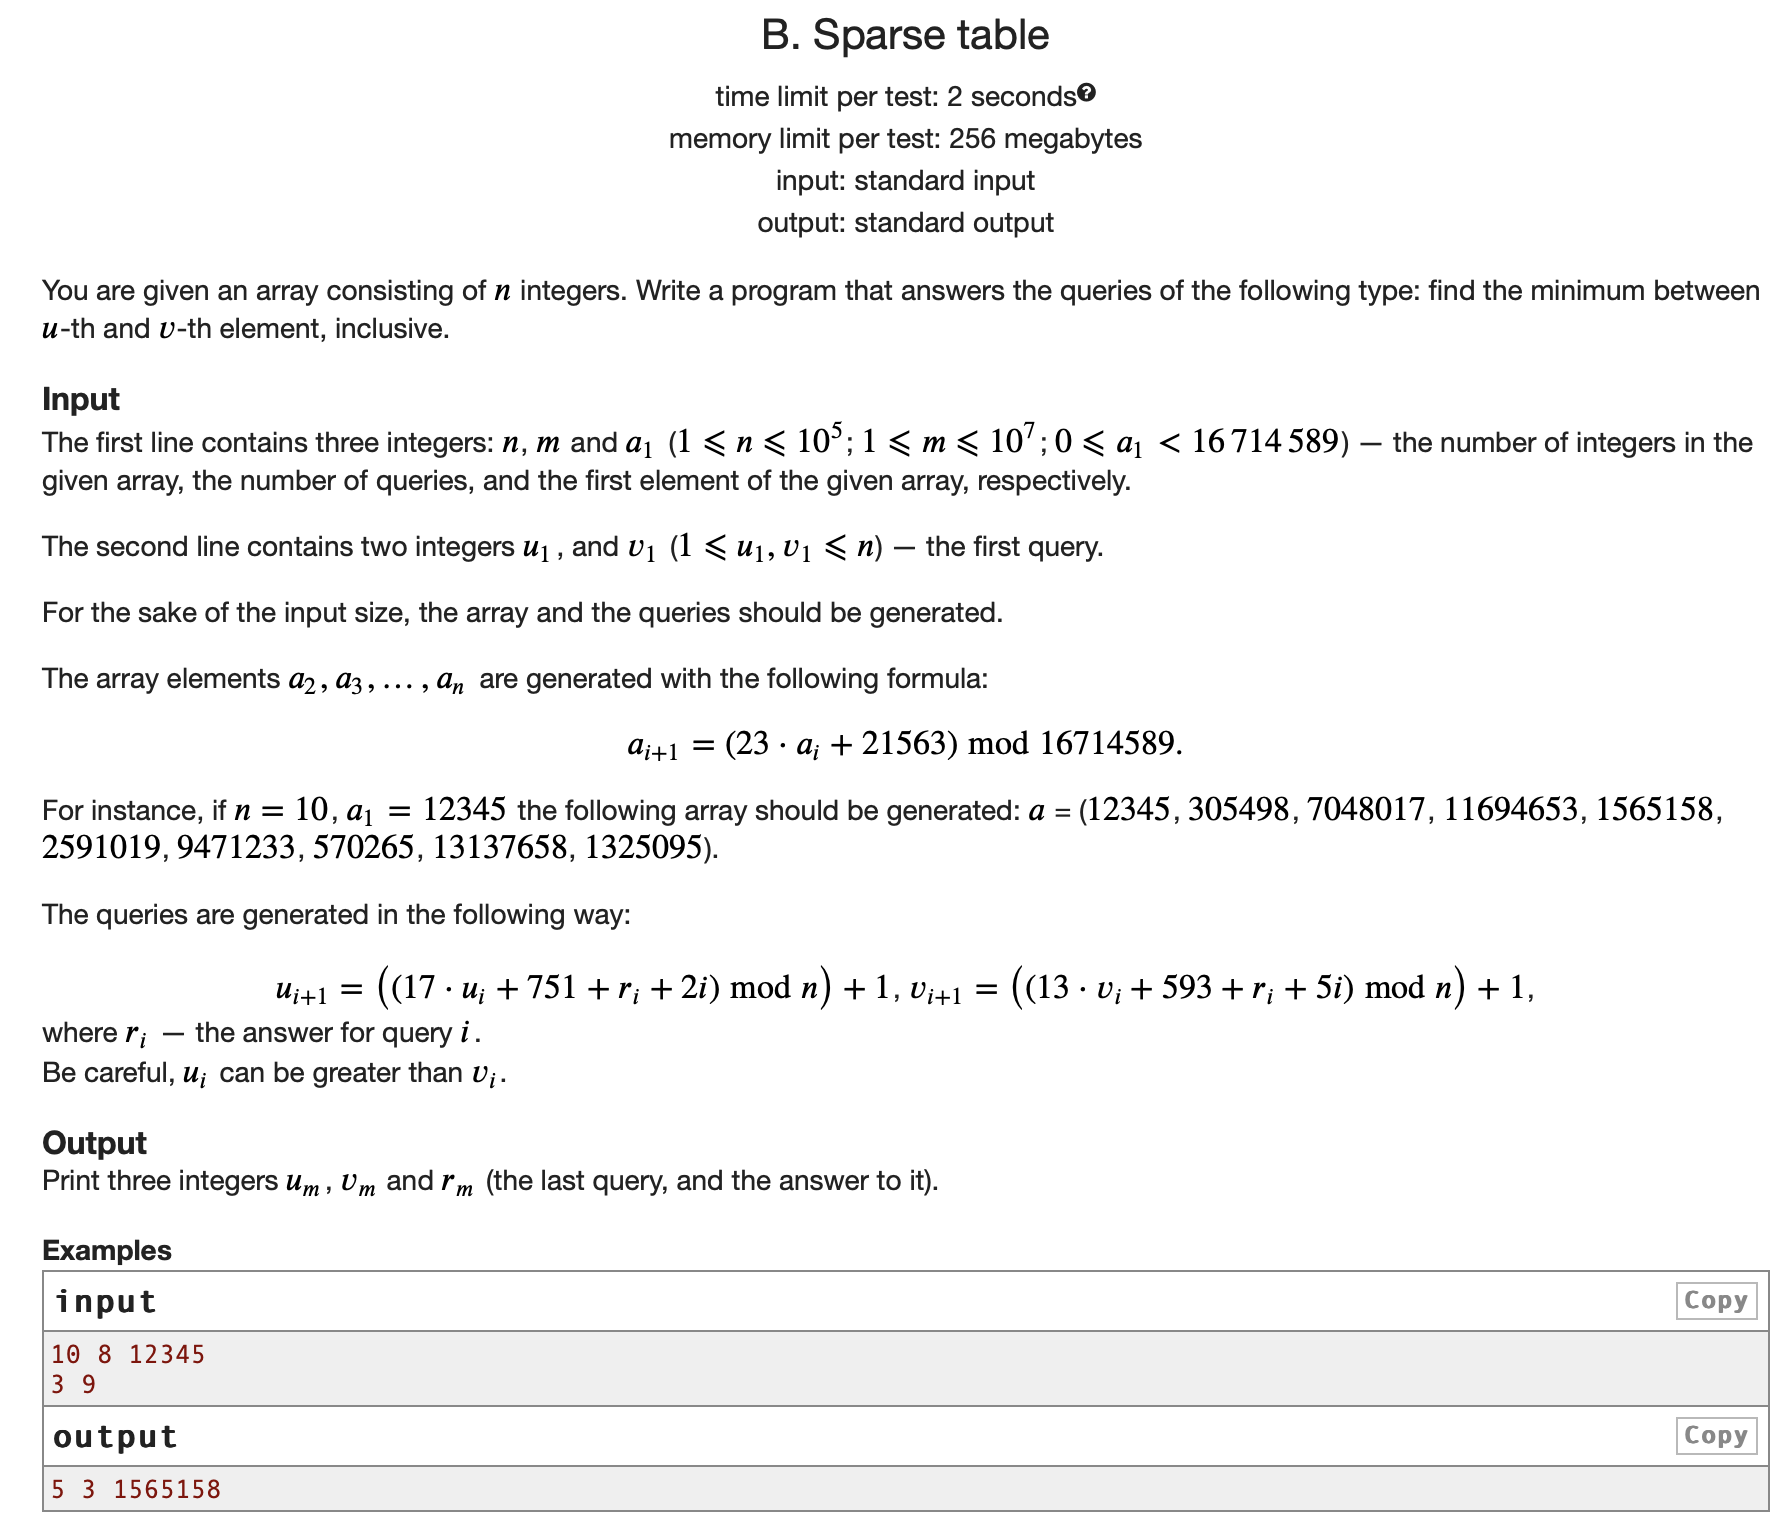

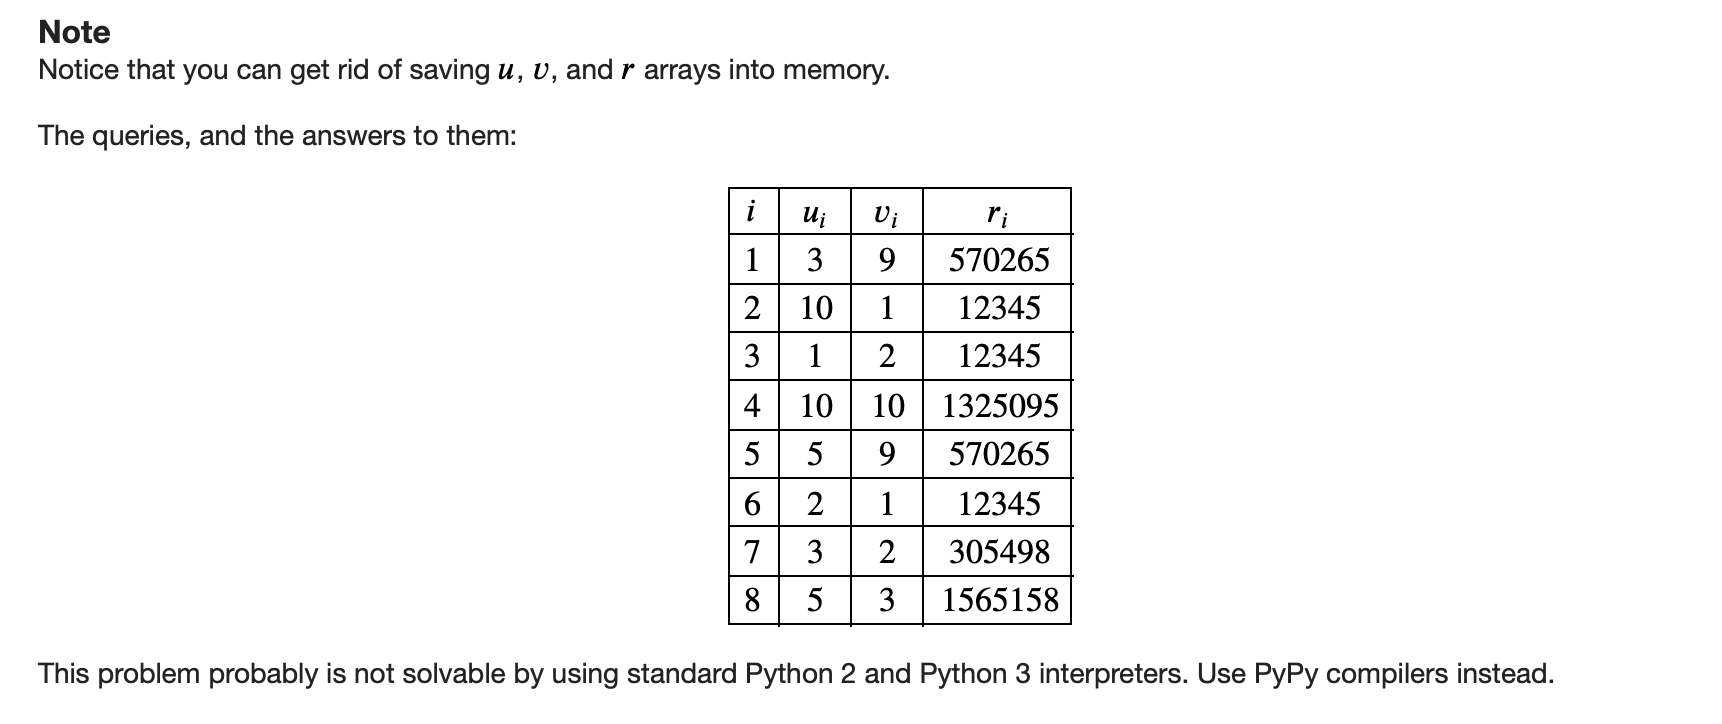

In [320]:
from math import ceil, log2

GEN_CONST_A = [23, 21563, 16714589]
GEN_CONST_L = [17, 751, 2, 1]
GEN_CONST_R = [13, 593, 5, 1]


def get_l_r(u, v):
    if u > v:
        return v - 1, u - 1
    return u - 1, v - 1


def get_k(n):
    k = [0] * n
    for i in range(1, n):
        k[i] = k[i - 1]
        if 2 ** (k[i] + 1) <= i + 1:
            k[i] += 1
    return k


def get_min(mins, l, r, k):
    return min(mins[l][k[r - l]], mins[r - 2 ** k[r - l] + 1][k[r - l]])


def generator_a(n, a_0):
    for i in range(n):
        if i == 0:
            a = a_0
        else:
            a = (GEN_CONST_A[0] * a + GEN_CONST_A[1]) % GEN_CONST_A[2]
        yield a


def init_dp(n, a_gen):
    m = ceil(log2(n)) + 1
    dp = [[0] * m for _ in range(n)]
    for i, a in enumerate(a_gen):
        dp[i][0] = a

    for k in range(1, m):
        for l in range(n):
            x = min(l + 2 ** (k - 1), n - 1)
            dp[l][k] = min(dp[l][k - 1], dp[x][k - 1])
    return dp
        

def request_generator(mins, u_0, v_0, m, n, k):
    value_prev = None
    u = u_0
    v = v_0
    for i in range(m):
        if i != 0:
            u = (GEN_CONST_L[0] * u + GEN_CONST_L[1] + value_prev + GEN_CONST_L[2] * i) % n + GEN_CONST_L[3]
            v = (GEN_CONST_R[0] * v + GEN_CONST_R[1] + value_prev + GEN_CONST_R[2] * i) % n + GEN_CONST_R[3]
        l, r = get_l_r(u, v)
        value_next = get_min(mins, l, r, k)
        value_prev = value_next
        yield u, v, value_next


n, m, a_0 = list(map(int, input().split()))
u_0, v_0 = list(map(int, input().split()))

a_gen = generator_a(n, a_0)
mins = init_dp(n, a_gen)
k = get_k(n)
requests = request_generator(mins, u_0, v_0, m, n, k)
for request in requests:
    u, v, value_next = request
print(u, v, value_next)

10 8 12345
3 9
5 3 1565158


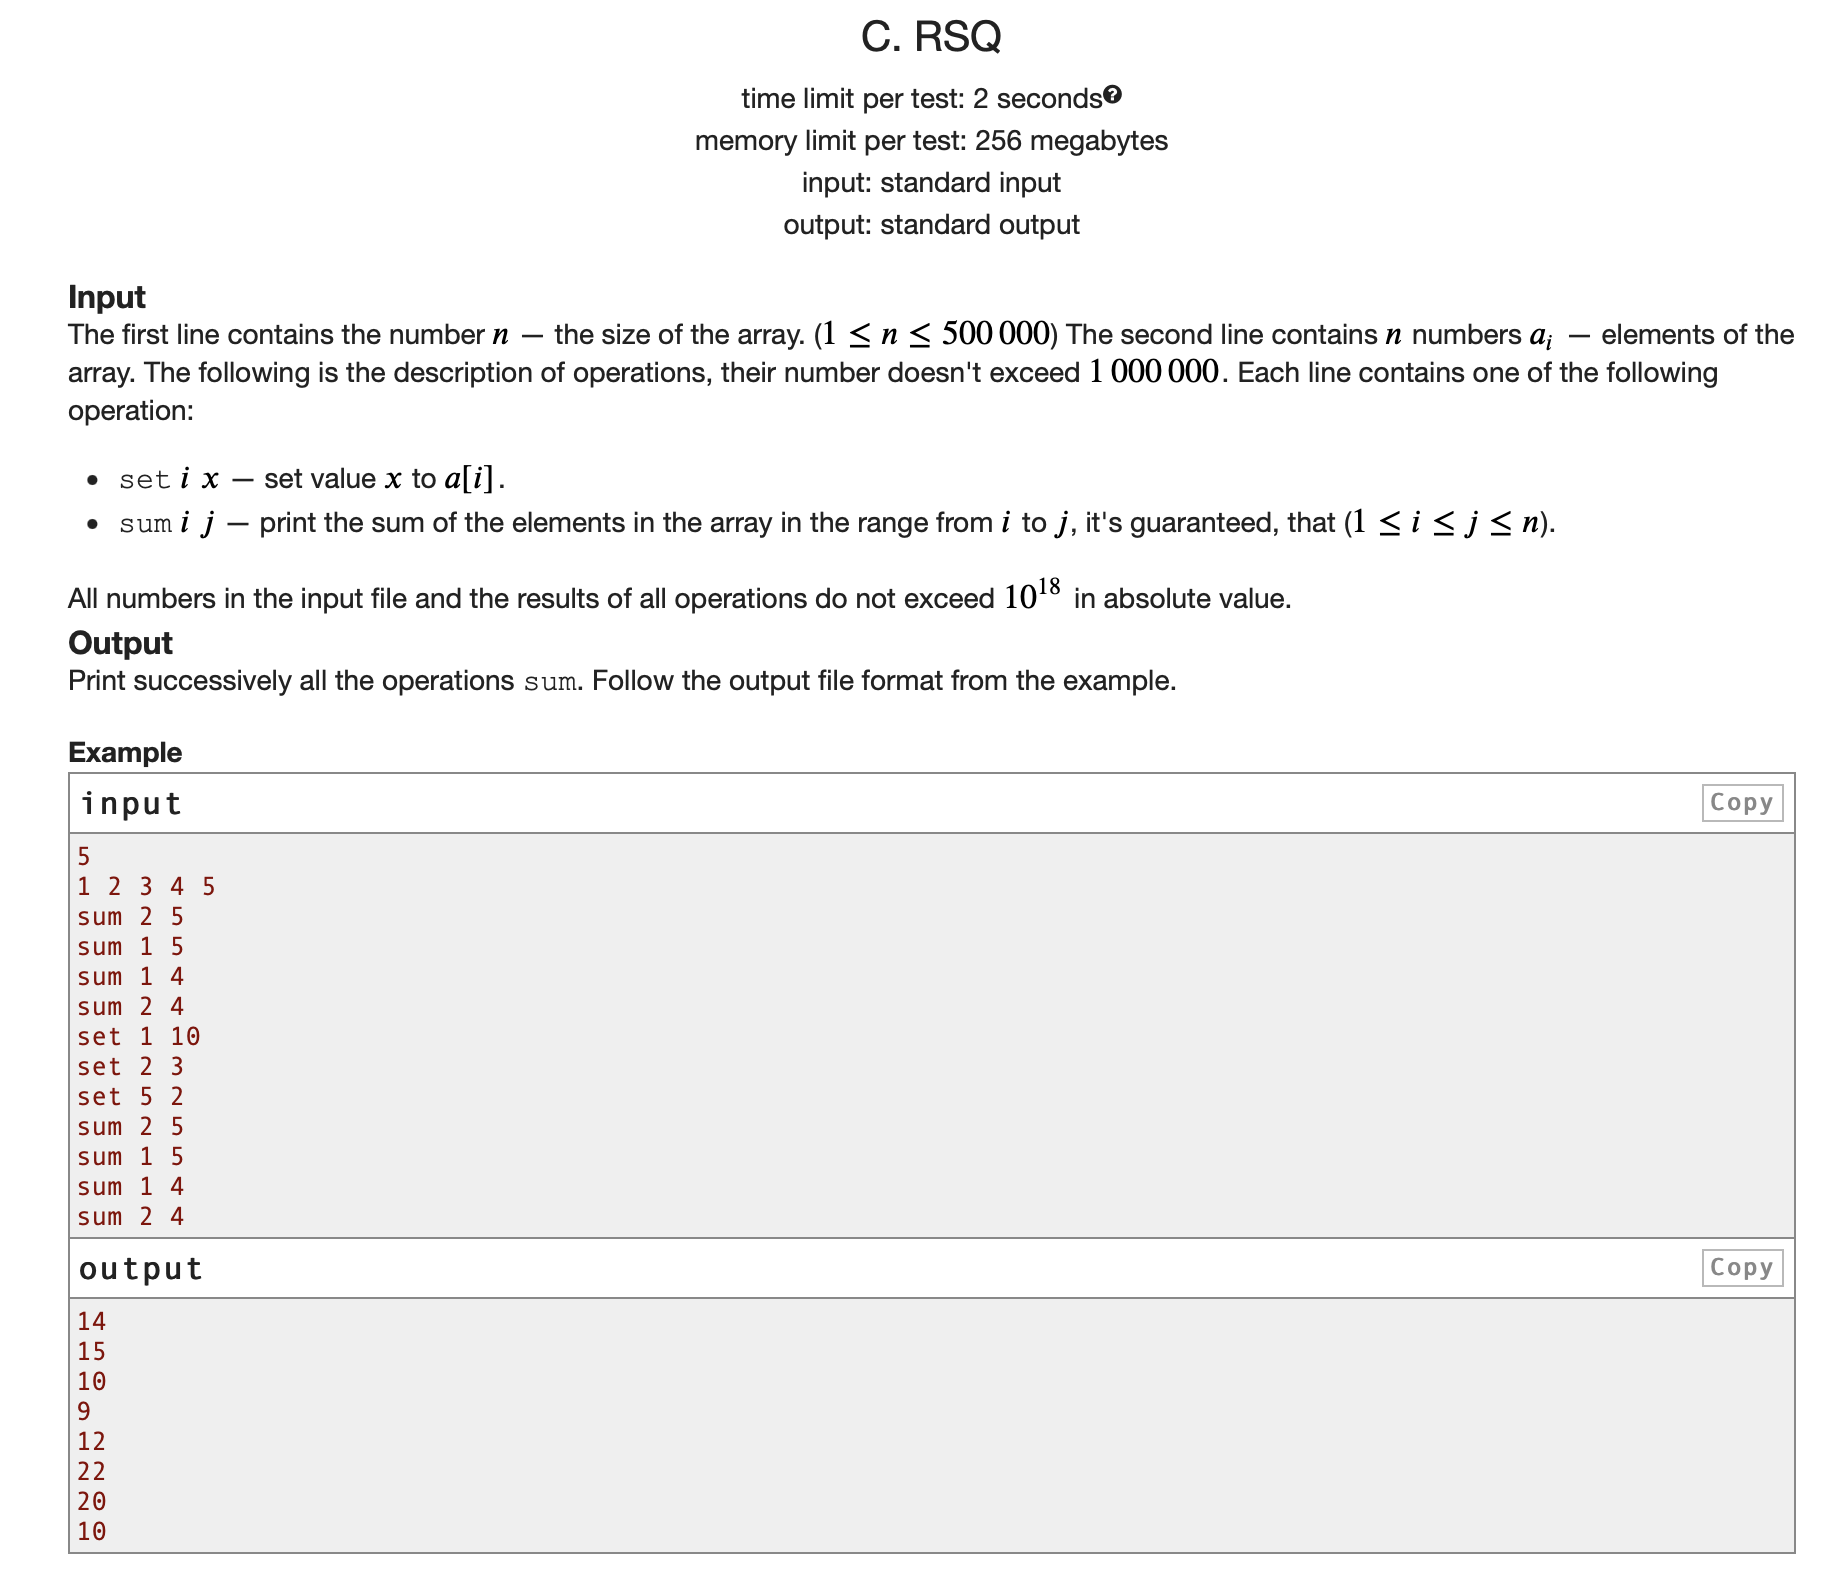

In [349]:
import sys


class FenwickTree:
    def __init__(self, arr):
        self.arr = arr
        self.tree = [0] * len(arr)
        for i in range(len(arr)):
            j = self.f_func(i)
            self.tree[i] = sum(arr[j:i + 1])

    def f_func(self, i):
        return i & (i + 1)

    def get(self, i):
        res = 0
        while i >= 0:
            res += self.tree[i]
            i = self.f_func(i) - 1
        return res

    def rsq(self, l, r):
        if l == 0:
            return self.get(r)
        return self.get(r) - self.get(l - 1)

    def add(self, i, val):
        j = i
        while j < len(self.tree):
            self.tree[j] += val
            j = j | (j + 1)

    def set_x(self, i, val):
        diff = val - self.arr[i]
        self.arr[i] = val
        self.add(i, diff)

    def __call__(self, operation, *args):
        if operation == 'sum':
            print(self.rsq(int(args[0]) - 1, int(args[1]) - 1))
        else:
            self.set_x(int(args[0]) - 1, int(args[1]))


_ = input()
arr = list(map(int, input().split()))
fenwick_tree = FenwickTree(arr)
for line in sys.stdin:
    fenwick_tree(*line.split())

5
1 2 3 4 5
sum 2 5
14
